## data processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import the data

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

feature scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

Data structure creation

In [5]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [7]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

Data reshaping

In [8]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

## build RNN

In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 =

In [10]:
##initialize the model

In [11]:
regressor = Sequential()

add 1st lstm layer

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(rate = 0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))


In [14]:
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))


In [15]:
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

In [16]:
##add output layer
regressor.add(Dense(units = 1))

## Model compiling

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Model fit

In [18]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0619
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0057
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0051
Epoch 9/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] 

1198/1198 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 90/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0016
Epoch 91/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0020
Epoch 92/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0019
Epoch 93/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 94/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0017
Epoch 96/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 10s 8ms/step

## Model prediction

import test data

In [19]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values

create prediction input

In [20]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [21]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

In [22]:
#scale input
inputs = sc.transform(inputs)

create test data strucutre

In [23]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model prediction

In [29]:
predicted_stock_price = regressor.predict(X_test)

In [30]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Result visualization

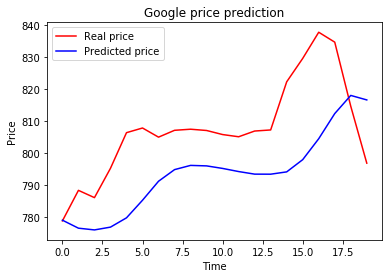

In [31]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()